<a href="https://colab.research.google.com/drive/1OF_EcCFtsJlrbXesQNV2wK5iYfeCN8sa?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

<img align="left" width="300" src="https://raw.githubusercontent.com/yijensun/soundscape_IR/master/docs/images/wf.png">

This notebook is an instruction of running the Python version of Soundscape Viewer on Google Colab. Another demo for the MATLAB version of Soundscape Viewer is available on [CodeOceans](https://codeocean.com/capsule/7292152/tree/v1). Please contact Harry Lin (schonkopf@gmail.com) if there are any questions.

---
In this demo, you will learn the following procedures:

(1) Deploy the Soundscape Viewer in your Google Colab

(2) Connect this codebook to your Google drive

(3) Handling long-term spectrogram (LTS)

(4) Unsupervised source separation

(5) Supervised source separation

(6) Identification of audio events

(7) Organize, visualize, and save the results

# Soundscape Viewer 

The [Soundscape Viewer](https://github.com/schonkopf/soundscape_IR) is an open toolbox of soundscape information retrieval. It contains three modules: (1) long-term spectrogram (LTS) maker, (2) source separation, and (3) clustering of audio events. This toolbox is mainly designed for the soundscape analysis without an audio recognition database.

> References
>*   Tzu-Hao Lin, Yu-Huang Wang, Han-Wei Yen, Shen-Shan Lu, Yu Tsao (2017) Computing biodiversity change via a soundscape monitoring network. PNC 2017 Annual Conference and Joint Meetings. https://doi.org/10.23919/PNC.2017.8203533
>*   Lin, T.-H.*, Akamatsu, T., Tsao, Y. (2021) Sensing ecosystem dynamics via audio source separation: A case study of marine soundscapes off northeastern Taiwan. PLoS Computational Biology, 17: e1008698. https://doi.org/10.1371/journal.pcbi.1008698
>*   Lin, T.-H.*, Akamatsu, T.*, Sinniger, F., Harii, S. (2021) Exploring coral reef biodiversity via underwater soundscapes. Biological Conservation, 253: 108901. https://doi.org/10.1016/j.biocon.2020.108901

To deploy the Soundscape Viewer in Colab, you have to download the codes from the Github website.
```bash
!git clone https://github.com/meil-brcas-org/soundscape_IR.git
```

In [ ]:
# Download the Soundscape Viewer from GitHub
!git clone https://github.com/meil-brcas-org/soundsape_IR.git

Cloning into 'soundscape_IR'...
remote: Enumerating objects: 236, done.
remote: Counting objects: 100% (236/236), done.
remote: Compressing objects: 100% (236/236), done.
remote: Total 425 (delta 168), reused 0 (delta 0), pack-reused 189
Receiving objects: 100% (425/425), 103.53 KiB | 6.90 MiB/s, done.
Resolving deltas: 100% (296/296), done.


# Access data in Google Drive

At first, we need to import the *lts_viewer* function and initiate the procedure.
```python
from soundscape_IR.soundscape_viewer import lts_viewer
LTS=lts_viewer()
```
Then, define the *folder_id* so that the lts_viewer can know where to get the mat files (by using *LTS_maker* function, all the long-term spectrograms are saved as mat files). If you do not know the *folder_id*, please go to your Drive folder and copy the text after the final slash (/) from the URL bar.
```python
folder_id='########################'
LTS.collect_Gdrive(folder_id=folder_id)
```
**There may be a message that shows you need to authorize this notebook the accessibility of your Drive folder. Please follow the instruction and approve the procedures.**

The *lts_viewer* function combines all the data stored in the designated folder (not including sub-folders), and organize the audio segments in chronological order. If you have data from different recording sites, please separate them in different folders!

In [1]:
# Collect all the mat files from a designated Drive folder according to the folder_id
# The example folder_id will take the algorithm to access a shared Drive folder
from soundscape_IR.soundscape_viewer import lts_viewer
folder_id='1dtkpfTivBRu_u8wA4nLSHfEsBIEvymiq'
LTS=lts_viewer(folder_id=folder_id)

Loading file: HCLLNP01_20160725-20160913.mat
Loading file: HCLLNP01_20160913-20161201.mat
Loading file: HCLLNP01_20161201-20170220.mat
Loading file: HCLLNP01_20170220-20170517.mat
Loading file: HCLLNP01_20170517-20170809.mat
Loading file: HCLLNP01_20170819-20171112.mat


(<Figure size 432x432 with 2 Axes>,
 <AxesSubplot:xlabel='Frequency', ylabel='Amplitude'>)

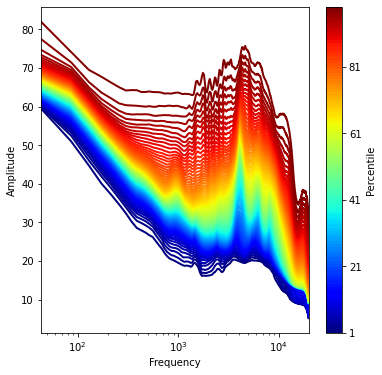

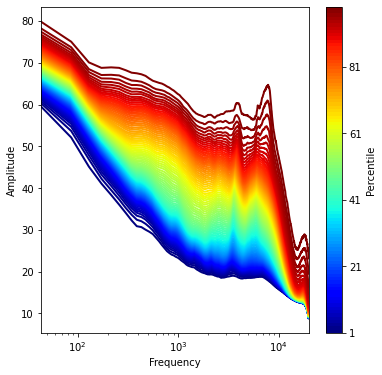

In [2]:
# Investigate the spectral characteristics and variations of loaded acoustic data
from soundscape_IR.soundscape_viewer.utility import matrix_operation
input_data,f=LTS.input_selection('median')
a=matrix_operation()
a.spectral_variation(input_data, f, month_selection=[4, 9])
a.plot_psd(freq_scale='log')
a.spectral_variation(input_data, f, month_selection=[10, 3])
a.plot_psd(freq_scale='log')

# Display the long-term spectrograms

Now it's time to display the long-duration audio recordings through the long-term spectrograms. The Soundscape Viewer uses **median-based**, **mean-based**, and **difference-based (mean-median)** **long-term spectrograms** to visualize the spectral-temporal variations of long-duration audio data.
```python
LTS.plot_lts()
```

You can also remove the background noise by using the *prewhiten_percent* attribute. The *prewhiten_percent* calculates the probability distribution of power spectral densities at each frequency bin, and consider the power spectral densities lower than a defined percentile as the background noise. For example, if you define the *prewhiten_percent* as 50, it means you define the median value as the background noise.
```python
input_data,f=LTS.input_selection('median', begin_date='20160901', end_date='20161001', f_range=[], prewhiten_percent=0)
a.plot_lts(input_data, f, vmin=0, vmax=80, fig_width=18, fig_height=8)
```



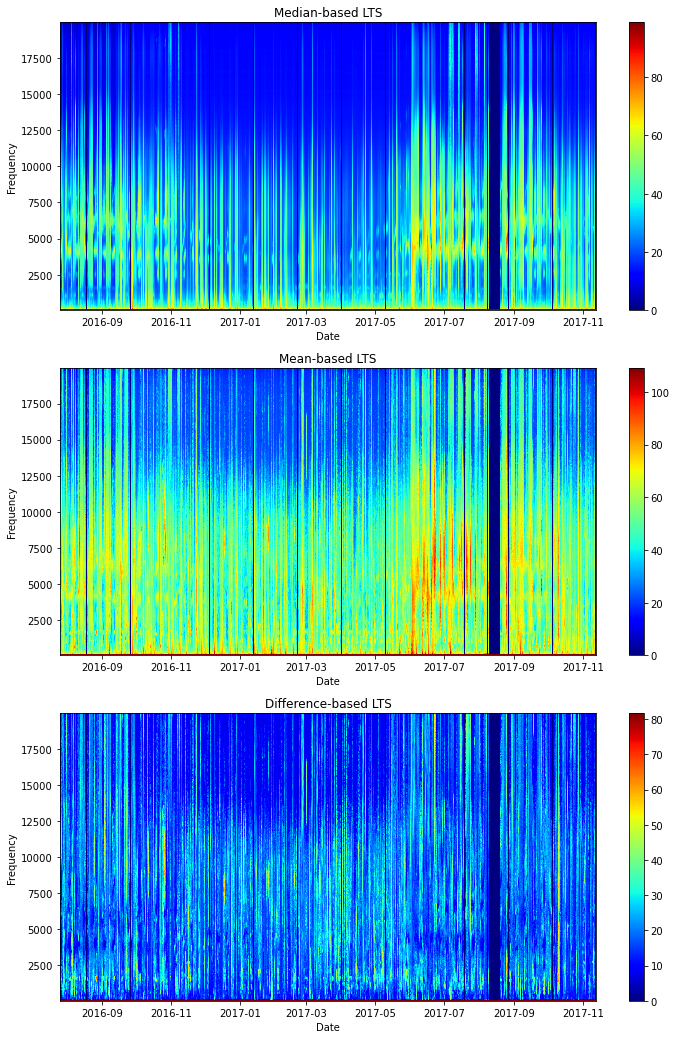

In [3]:
LTS.plot_lts(day_correct='windows')

(<Figure size 1296x432 with 2 Axes>, <AxesSubplot:ylabel='Frequency'>)

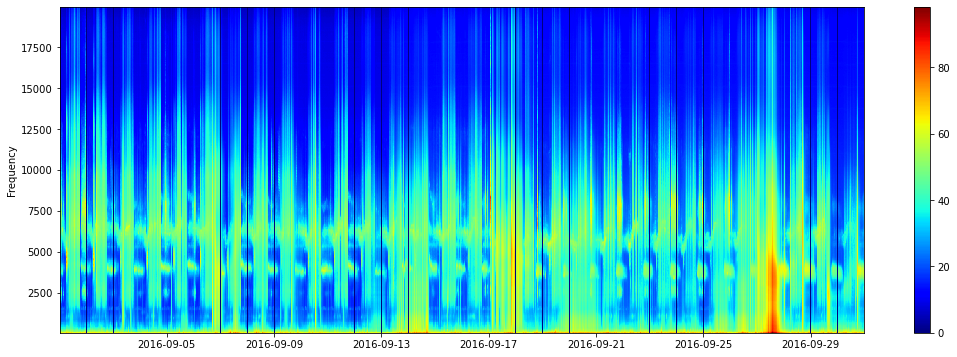

In [5]:
# Plot the long-term spectrograms
input_data,f=LTS.input_selection('median', begin_date='20160901', end_date='20161001', f_range=[], prewhiten_percent=0)
#a.plot_lts(input_data, f, vmin=0, vmax=80, fig_width=18, fig_height=8)

from soundscape_IR.soundscape_viewer import matrix_operation
matrix_operation().plot_lts(input_data,f, day_correct='windows')

# Audio source separation

On the long-term spectrogram, we can see multiple sound sources, and sometimes they are interfering with each other. In order to reduce the interference of simultaneous sound sources, it is necessary to develop a model for separating different sound sources. In this example, we will introduce the **Periodicity-coded Non-negative Matrix Factorization (PC-NMF)**. 

The PC-NMF is a unsupervised learning tool, which can separate different sources according to the source-specific periodical patterns. For example, biotic sounds usually display prominent diurnal pattern. Therefore, we can apply the PC-NMF to separate the biological choruses and the other sound sources from a long-term spectrogram.

> References
> *   Tzu-Hao Lin, Shih-Hua Fang, Yu Tsao. (2017) Improving biodiversity assessment via unsupervised separation of biological sounds from long-duration recordings. [Scientific Reports, 7: 4547.](https://www.nature.com/articles/s41598-017-04790-7)

At first, we need to import the *pcnmf* function and initiate the procedure.
```python
from soundscape_IR.soundscape_viewer import pcnmf
model=pcnmf(feature_length=72, basis_num=30)
```
* frame_length : int (>=1)
> Control the number of frames for feature learning. Generally, a longer frame will result in better learning performance. However, it may cost too much memory and result in very long computation time. If there is sufficient computation power, choose a value close to the duration of target signals.

* basis_num : int (>=1)
> Control the number of basis functions for feature learning. For a high diversity soundscape, choose a large number of bais functions may improve the reconstruction performance.

Second, define the input and try to build a model without any labeled data.
```python
data_input='median'
input_data, f=LTS.input_selection(data_input, prewhiten_percent=20)
model.unsupervised_separation(input_data, f, source_num=2)  
```
* data_input : median | mean | diff
> Three types of long-term spectrograms, namely median-based, mean-based, and the difference-based long-term spectrograms.

* source_num : int (>1)
> Number of separated sources. Source separation is based on the source-specific periodical patterns. Currently, the PC-NMF is unlikely to separate too many sources from a long-term spectrogram.


In [39]:
# Import source_separation and define model parameters
from soundscape_IR.soundscape_viewer import pcnmf
model=pcnmf(feature_length=72, basis_num=30)

# Unsupervised separation
data_input='median'
input_data, f=LTS.input_selection(data_input, prewhiten_percent=20)
W, H, W_cluster = model.unsupervised_separation(input_data, f, source_num=2)      

C:\Users\user\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\soundscape_IR\soundscape_viewer\source_separation.py:111: RuntimeWarning: invalid value encountered in true_divide
  mask=np.divide(source,source0)


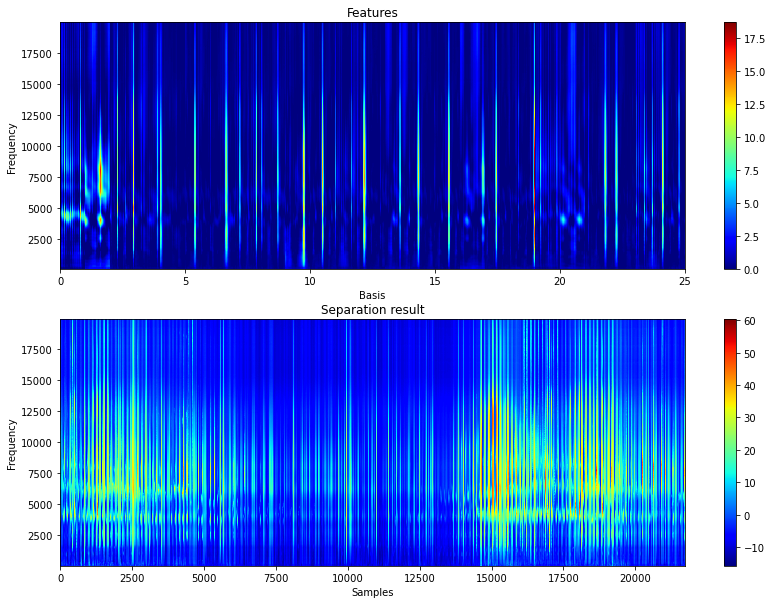

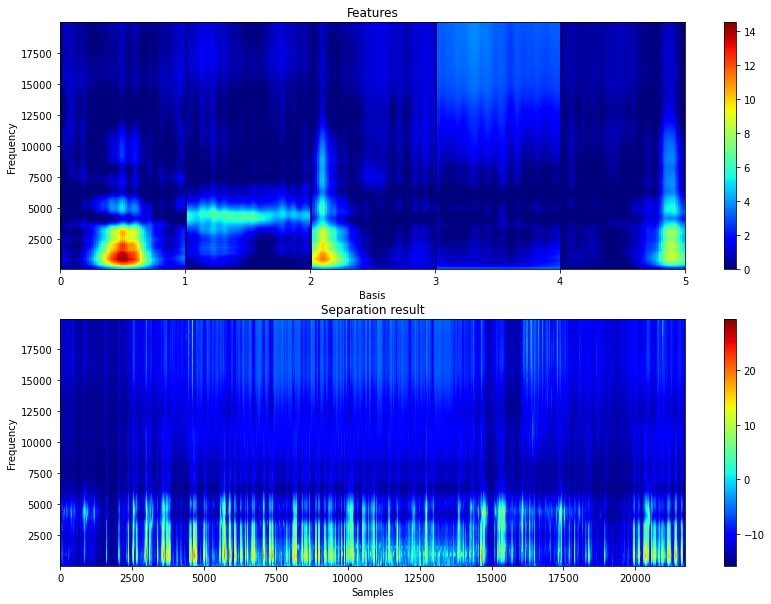

In [40]:
# Display the spectral features learned in the model and the reconstructed LTS of each separated source
model.plot_pcnmf(source=1)
model.plot_pcnmf(source=2)

# Save model parameter, if you want to save the mat directly in a specific Drive folder, please enter the folder_id
model.save_model(filename='LTS_median_pcnmf.mat')

# Prediction

When you have new data at the same recording site, you can try to use the previous model to estimate the strength of different sources. This approach can help understand the long-term changing pattern of soundscapes. In supervised separation, the spectral features are fixed, and the model only attempts to learn new temporal activations.

At first, initiate the *pcnmf* function and designate a mat file contains the model parameters. If your Colab environment does not have a mat file, please upload in advance.
```python
model=pcnmf()
model.load_model(filename='LTS_median_pcnmf.mat')
```
After loading the model, define the input, and run supervised separation.
```python
input_data, f=LTS.input_selection(data_input, prewhiten_percent=20)
model.supervised_separation(input_data, f, iter=50)
```




In [5]:
# Run supervised separation based on the saved model
from soundscape_IR.soundscape_viewer import pcnmf
model=pcnmf()
model.load_model(filename='LTS_median_pcnmf.mat')

# Define the input and run supervised separation
data_input='median'
input_data, f=LTS.input_selection(data_input, prewhiten_percent=20)
model.supervised_separation(input_data, f, iter=50)

Model parameters:
Minimum and maximum frequency: 43.06640625 Hz and 19982.8125 Hz
Frequency resolution: 43.06640625 Hz
Feature length: 72
Number of basis functions: 30
Number of sources: 2
Sparseness: 0


C:\Users\user\anaconda3\lib\site-packages\soundscape_IR\soundscape_viewer\source_separation.py:111: RuntimeWarning: invalid value encountered in true_divide
  mask=np.divide(source,source0)


# Organize the separation result

Before we continue to clustering, let us organize the separation result. Import the *data_organize* function and initiate a spreadsheet.
```python
from soundscape_IR.soundscape_viewer import data_organize
analysis_result=data_organize()
```
Then, designate the time vector, data, and the associated header for the data.
```python
analysis_result.time_fill(time_vec=model.time_vec, data=model.relative_level[0], header='S1_level')
```

Once the data is saved in the spreadsheet, then we can visualize the temporal changing pattern.
```python
analysis_result.plot_diurnal(col=1)
```


In [12]:
# Import the data_organize function and initiate a spreadsheet
from soundscape_IR.soundscape_viewer import data_organize
analysis_result=data_organize()

# Organized the relative levels of separated sources in the spreadsheet
for n in range(len(model.relative_level)):
  analysis_result.time_fill(time_vec=model.time_vec, data=model.relative_level[n], header='S'+str(n+1)+'_level')


A new spreadsheet has been created.
Columns in the spreadsheet:  ['Time', 'S1_level']
Columns in the spreadsheet:  ['Time' 'S1_level' 'S2_level']


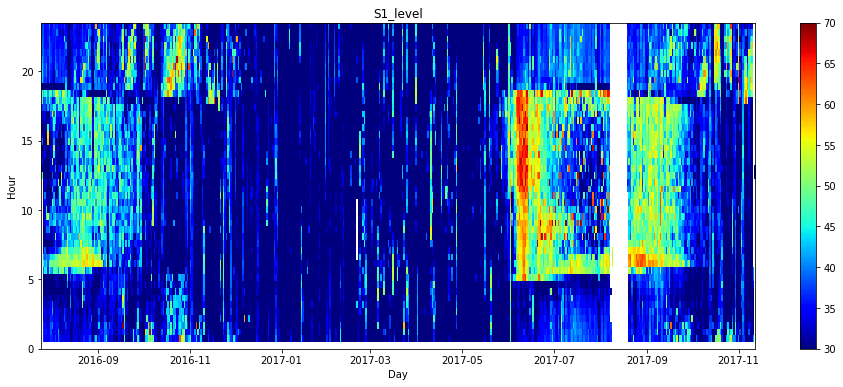

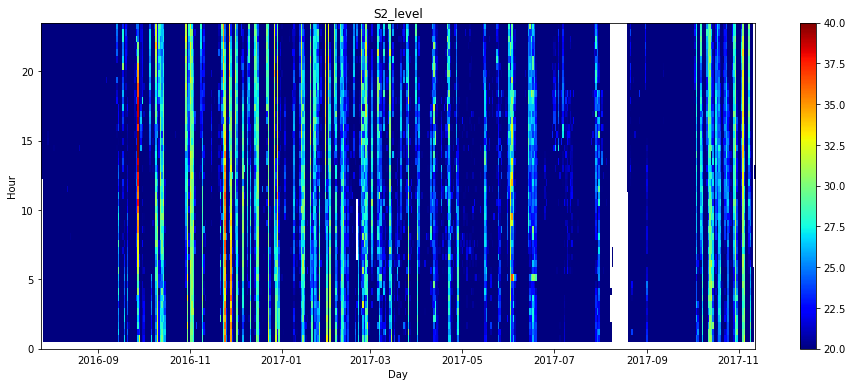

In [8]:
# Investigate the diurnal (y-axis) and seasonal change (x-axis) of source behavior
S1_diurnal, hr = analysis_result.plot_diurnal(col=1, vmin=30, vmax=70, day_correct='windows') # Dominated by morning and dawn choruses
S2_diurnal, hr = analysis_result.plot_diurnal(col=2, vmin=20, vmax=40, day_correct='windows') # Dominated by seasonal rainfall

# Clustering of audio events

In this example, we don't have any recognition database. Therefore, we use ***k*-means clustering** to identify audio events with unique spectral features. In the Soundscape Viewer, the feature dimension is reduced by using **Principal Component Analysis**. Then, *k*-means clustering is performed on the principal components that explain most of the data variation.

At first, import the *clustering* function and define parameters.
```python
from soundscape_IR.soundscape_viewer import clustering
cluster_result=clustering(k=2, pca_percent=0.9, method='kmeans')
```
*  number_cluster : float (0, 1) or int > 1
> Number of clusters when *k* is greater than 1. When k is less than 1, the algorithm tries to find an optimal cluster number so that the clustering result can explain  *k* x 100% of data variation. For example, when *k* is defined as 0.9, different *k* is tried until the model finds a minimal *k* that explain 90% of data variation.

*  component_varation : float (0-1)
> Amount of variation for the dimension reduction of feature space.

Then, run clustering on the designated input.
```python
cluster_result.run(input_data=model.separation[0], f=f)
```
Once we have the clustering result, we can save the spectral feature (median) of each audio cluster in a CSV file.
```python
cluster_result.save_cluster_feature(filename='S1_Cluster_feature.csv')
```

Finally, organize the clustering labels in the spreadsheet of analysis result.
```python
analysis_result.time_fill(time_vec=cluster_result.time_vec, data=cluster_result.cluster, header='S1_Cluster')
```

After saving the clustering result in the spreadsheet, we can visualize the temporal changing structure of audio clusters and spectral characteristics of audio clusters.
```python
analysis_result.plot_diurnal(col=3)
cluster_result.plot_cluster_feature(cluster_no=1, freq_scale='linear')
```

In [13]:
# Use K-means clustering to investigate soundscape structure
from soundscape_IR.soundscape_viewer import clustering
cluster_result=clustering(k=0.95, pca_percent=0.9, method='kmeans')

# Run clustering on separated source #1
cluster_result.run(input_data=model.separation[0],f=f)
# Add the clustering labels in the spreadsheet of analysis result
analysis_result.time_fill(time_vec=cluster_result.time_vec, data=cluster_result.cluster, header='S1_Cluster')
# Save the spectral features (median) of each audio cluster. 
# If you want to save the mat directly in a specific Drive folder, please enter the folder_id
cluster_result.save_cluster_feature(filename='S1_Cluster_feature.csv')

# Run clustering on separated source #2
cluster_result2=clustering(k=2, pca_percent=0.9, method='kmeans')
cluster_result2.run(input_data=model.separation[1],f=f)
# Add the clustering labels in the spreadsheet of analysis result
analysis_result.time_fill(time_vec=cluster_result2.time_vec, data=cluster_result2.cluster, header='S2_Cluster')
# Save the spectral features (median) of each audio cluster. 
cluster_result2.save_cluster_feature(filename='S2_Cluster_feature.csv')

k: 1 , explained variation: 0.0
k: 2 , explained variation: 0.675708703986859
k: 3 , explained variation: 0.8335263032396836
k: 4 , explained variation: 0.8910910327245003
k: 5 , explained variation: 0.9181930156772257
k: 6 , explained variation: 0.9337312023110484
k: 7 , explained variation: 0.9430059514275407
k: 8 , explained variation: 0.9489320214557179
k: 9 , explained variation: 0.9544211689831794
Final trial: run  9  clusters
Columns in the spreadsheet:  ['Time' 'S1_level' 'S2_level' 'S1_Cluster']
Successifully save to S1_Cluster_feature.csv
Final trial: run  2  clusters
Columns in the spreadsheet:  ['Time' 'S1_level' 'S2_level' 'S1_Cluster' 'S2_Cluster']
Successifully save to S2_Cluster_feature.csv


In [17]:
# Save the analysis result as csv
# If you want to save the mat directly in a specific Drive folder, please enter the folder_id
analysis_result.save_csv(filename='Analysis_result.csv')

# If you do not save the CSV file in a Drive folder, please open the Files page at the left panel. 
# Then, right click to download the file you want.

Successifully save to Analysis_result.csv


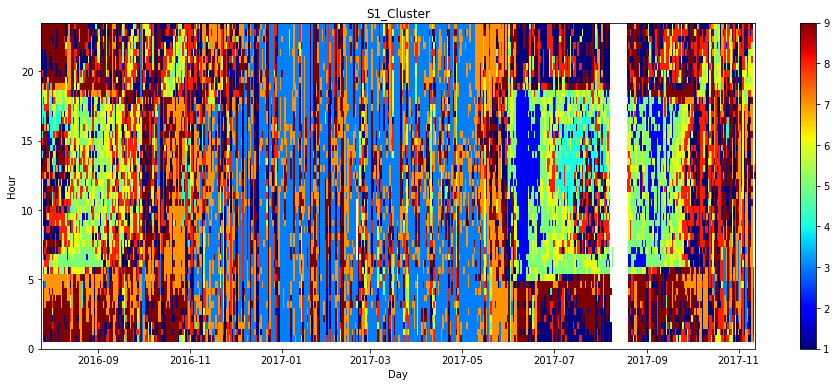

In [18]:
# Investigate the diurnal (y-axis) and seasonal change (x-axis) of clustering labels
S1_clustering, hr = analysis_result.plot_diurnal(col=3, day_correct='windows')

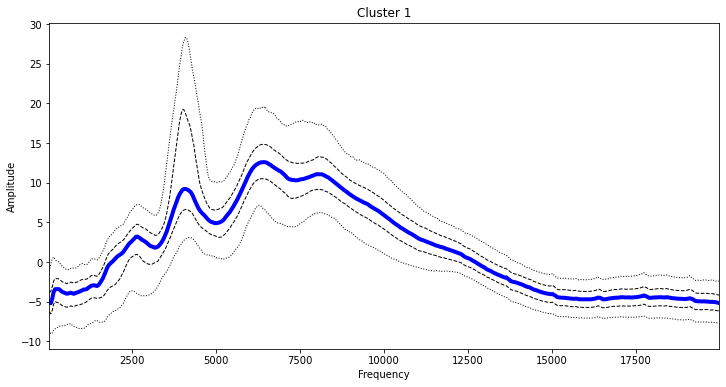

In [19]:
# Investigate the spectral characteristics of each audio cluster (5-25-50-75-95 percentiles)
cluster_result.plot_cluster_feature(cluster_no=1, freq_scale='linear')